<img src='https://gitlab.eumetsat.int/eumetlab/oceans/ocean-training/tools/frameworks/-/raw/main/img/Standard_banner.png' align='right' width='100%'/>

<a href="../../Index.ipynb" target="_blank"><< Index</a>

<font color="#138D75">**Copernicus Marine Training Service**</font> <br>
**Copyright:** 2025 European Union <br>
**License:** MIT <br>
**Authors:** Ben Loveday (EUMETSAT/Innoflair UG), Hayley Evers-King (EUMETSAT), Juan Ignacio-Gossn (EUMETSAT)

<html>
   <div style="float:left"><p>&emsp;</p></div>
   <div style="float:left"><a href="https://gitlab.eumetsat.int/eumetlab/oceans/ocean-training/applications/ocean-colour-applications"><img src="https://img.shields.io/badge/open-EUMETLAB-E67E22.svg"></a></div>
   <div style="float:left"><p>&emsp;</p></div>
   <div style="float:left"><a href="https://user.eumetsat.int/data/themes/marine"><img src="https://img.shields.io/badge/open-USER PORTAL-154360.svg"></a></div>
   <div style="float:left"><p>&emsp;</p></div>
   <div style="float:left"><a href="https://jupyterhub.prod.wekeo2.eu/hub/"><img src="https://img.shields.io/badge/launch-WEKEO-1a4696.svg"></a></div>
   <div style="float:left"><p>&emsp;</p></div>
   <div style="float:left"><a href="https://code.insula.destine.eu/hub/"><img src="https://img.shields.io/badge/launch-DestinE-f43fd3.svg"></a></div></div>
</html>

<div class="alert alert-block alert-success">
<h3>Ocean colour applications</h3></div>

<div class="alert alert-block alert-warning">
    
<b>PREREQUISITES </b>
    
This notebook has the following prerequisites:
- **<a href="https://user.eumetsat.int/cas/login" target="_blank">A EUMETSAT User Portal account</a>** to enable you to download products from the EUMETSAT Data Store.

There are no prerequisite notebooks for this module, but you may be interested in the following GitLab repositories if you wish to learn more about using marine data from Sentinel-3 OLCI, or the ThoMaS Match-up validation toolkit:
- **<a href="https://gitlab.eumetsat.int/eo-lab-usc-open/ocean/sensors/learn-olci" target="_blank">learn-olci</a>**
- **<a href="https://gitlab.eumetsat.int/eumetlab/oceans/ocean-science-studies/ThoMaS" target="_blank">ThoMaS</a>**


WHERE TO RUN THIS NOTEBOOK?

This notebook can be run on a local machine or on a remote cloud system, and is tested on WEkEO and the DestinE Insula Code services. You can use the buttons at the top of the notebook to access these platforms, but you will need a free account on whichever service you choose. Full instructions for how to set up this notebook is provided in the README. Running on Binder is not possible due to the size of dependencies.
</div>
<hr>

# Validating ocean colour products with cruise track data using the ThoMaS toolkit
<font color="#138D75">**Devloped by EUMETSAT in support of the 2025 ESA OTC course**</font>


### Data used

| Dataset | EUMETSAT collection ID| EUMETSAT collection<br>description | WEkEO dataset ID | WEkEO description |
|:--------------------:|:-----------------------:|:-------------:|:-----------------:|:-----------------:|
| Sentinel-3 OLCI level 2 full resolution | EO:EUM:DAT:0407 | <a href="https://user.eumetsat.int/catalogue/EO:EUM:DAT:SENTINEL-3:OL_2_WFR___NTC" target="_blank">Description</a> | EO:EUM:DAT:SENTINEL-3:OL_2_WFR___ | <a href="https://www.wekeo.eu/data?view=dataset&dataset=EO%3AEUM%3ADAT%3ASENTINEL-3%3AOL_2_WFR___" target="_blank">Description</a> |
| Sentinel-3 OLCI level 2 full resolution BC003 reprocessing | EO:EUM:DAT:0556 | <a href="https://user.eumetsat.int/catalogue/EO:EUM:DAT:0556" target="_blank">Description</a> | EO:EUM:DAT:SENTINEL-3:0556 | <a href="https://www.wekeo.eu/data?view=dataset&dataset=EO%3AEUM%3ADAT%3ASENTINEL-3%3A0556" target="_blank">Description</a> |

### Learning outcomes

At the end of this notebook you will know;
* how to use the ThoMaS toolkit to perform OLCI match-up validation extractions and analyses against cruise track data

### Outline

----- EDIT ------ <br>
Validation studies are essential to ensuring satellite sensor performance and a necessary part of algorithm development. For ocean colour studies, match-up analyses are a key part of validation. The ThoMaS (Tool to generate Matchups of OC products with Sentinel-3/OLCI) package provides a comprehensive set of tools to help with the validation of OLCI products, supporting many common workfows including;
* satellite data acquisition
* mini file extraction
* *in situ* data management
* BRDF correction

ThoMaS is written in Python and is made available through a **<a href="https://gitlab.eumetsat.int/eumetlab/oceans/ocean-science-studies/ThoMaS" target="_blank">EUMETSAT Gitlab repository</a>**. The package can be used from the command line, or imported as a Python library, as done here. This notebook contains 3 examples of how to use ThoMaS in various ways, but the capability shown is not exhaustive. Many more command-line examples are included in the repository, and we encourage users to familiarise themselves with both the **<a href="https://gitlab.eumetsat.int/eumetlab/oceans/ocean-science-studies/ThoMaS/-/blob/main/README.md" target="_blank">project README</a>** and **<a href="https://gitlab.eumetsat.int/eumetlab/oceans/ocean-science-studies/ThoMaS/-/blob/main/README_examples.md" target="_blank"> example README</a>** for more information.

The examples given here should give you some insight into what ThoMaS can do, but we encourage you to build on these to facilitate your own validation workflows.
<br> ----- EDIT ------


Before we begin you should note that this notebook can be run locally, or on a remote cloud system, by cloning the **<a href="https://gitlab.eumetsat.int/eumetlab/oceans/ocean-training/applications/ocean-colour-applications" target="_blank">ocean-colour-applications</a>** repository. The **<a href="https://gitlab.eumetsat.int/eumetlab/oceans/ocean-training/applications/ocean-colour-applications/-/blob/main/README.md" target="_blank">README</a>** file will fully describe how to create an appropriate Python environment to run this code.

**Note: to download the required EUMETSAT OLCI data, you will need to register for a <a href="https://user.eumetsat.int/cas/login" target="_blank">EUMETSAT User Portal</a> account. Please see the prerequisites for more information on how to do this**.

<div class="alert alert-info" role="alert">

## <a id='TOC-TOP'></a>Contents

</div>

1. [Step 1: Setting up our analysis](#section1)
1. [------: A quick preamble on functions](#section0)
1. [Step 2: Loading and plotting our cruise tracks](#section2)
1. [Step 3: Loading ThoMaS](#section3)
1. [Step 4: Configuring ThoMaS](#section4)
2. [What next?](#section6)

<hr>

<div class="alert alert-info" role="alert">

## <a id='section1'></a>Step 1: Setting up our analysis
[Back to top](#TOC_TOP)

</div>

We begin by importing all of the libraries that we need to run this notebook. If you have built your python using the environment file provided in this repository, then you should have everything you need. For more information on building environment, please see the repository **<a href="https://gitlab.eumetsat.int/eumetlab/oceans/ocean-training/applications/ocean-colour-applications/-/blob/main/README.md" target="_blank">README</a>**.

In [1]:
import os                                   # a library that allows us access to basic operating system commands like making directories
import sys                                  # a library that provides access to system commands
import pandas as pd                         # a library that helps us manipulate data 
import shutil                               # a library that allows us access to basic operating system commands like copy
import numpy as np                          # a library that provides support for array-based mathematics
from IPython.display import Image, display  # a library that helps us plot images
import glob                                 # a library that helps us find files
import datetime
import matplotlib.pyplot as plt
import cartopy

For our analysis, we will need the ThoMaS toolkit. The first thing we need to do is retrieve the tool kit itself. We can do this using the external `! git clone` command. This will create a directory called **ThoMaS** in this path and make the code available for import. If the directory already exists, this cell will be skipped.

In [2]:
if os.path.exists(os.path.join("ThoMaS", "main.py")):
    print("ThoMaS is already installed.")
else:
    ! git clone https://gitlab.eumetsat.int/OC/External/ThoMaS.git

ThoMaS is already installed.


Lets set a couple of quick parameters that help us with handling data. `pad` will set a buffer around our cruise data for plotting. `cruise_point_min`, `cruise_point_max` will subsample our cruise data as required, and `max_depth` will allows us to filter our data for shallow measurements.

In [3]:
pad = 1
cruise_point_min = 0
cruise_point_max = -1
max_depth = 15

<div class="alert alert-warning" role="alert">

## <a id='section0'></a>A quick preamble on functions
[Back to top](#TOC_TOP)

</div>

Before we go any further we are going to define a couple of quick functions. The first helps us to write our configuration options to a file.

*Note: We don't need to write our configurations in python, we could always just write the configuration file directly and point ThoMaS to it*

In [4]:
# Write config_params sections into config_file.ini
def write_config_file(path_to_config_file,config_params):
    with open(path_to_config_file, 'w') as text_file:
        for section,section_params in config_params.items():
            text_file.write('\n[%s]\n' % (section))
            for param, value in section_params.items():
                text_file.write('%s: %s\n' % (param, value))

The second function simply just adds embellishments (gridlines, labels etc) to plots.

In [5]:
def embellish_plot(m):
    """Quick function to embellish SLSTR plots with gridlines and labels

    Args:
        m (axis): the axis to plot into
    Returns:
        None
    """
    # add some map embellishments
    m.add_feature(cartopy.feature.NaturalEarthFeature('physical', 'land', '10m', edgecolor='k', facecolor='#546d51', linewidth=0.5), zorder=8)
    g1 = m.gridlines(draw_labels = True, linestyle='--', zorder=10)
    g1.top_labels = g1.right_labels = False
    g1.xlabel_style = g1.ylabel_style = {'color': 'gray'}

<div class="alert alert-info" role="alert">

## <a id='section2'></a>Step 2: Loading and plotting our cruise track
[Back to top](#TOC_TOP)

</div>

<figure>
  <img src='../../img/Cruise_track.png' align='right' width='55%'/>
</figure>

Lets start by taking a look at the proposed cruise track for the Statsraad Lehmkuhl for the ESA OTC 2025 course, as shown on the right. Here, the markers show us the way points logged for the cruise, and not all the actual sampling positions. Of course, as this cruise is scheduled in the future we don't yet have any data to compare with any CHL products, so we will use another cruise that covers some of the same area as an example.

For our test cruise, we will use the first leg AWI Polerstern expedition <a href="https://www.frontiersin.org/journals/marine-science/articles/10.3389/fmars.2020.00235/full">PS113</a> as it sampled northeastern Atlantic quite recently, in 2018. The cruise data is also freely available through <a href="https://doi.pangaea.de/10.1594/PANGAEA.911061">Pangaea</a>, and incudes pigment analysis. We will use the chlorophyll-a data from this instrument as the *in situ* data set for our analysis, but you could choose any other cruise to do the same analysis, provided you correctly map the data when you ingest it (more on this below).

Lets read in the data from the cruise track, as stored in our "tracks" directory, using the `pandas` package (which we imported under the alias "pd"). Our specific cruise data is stored in the "PS113_HPLC_pigments_PFTs_QCle30.tab" file, which includes an 83-line header description followed by a series of tab-separated columns containing our data. We need to specify the number of header rows to skip them when reading the file, as well as the delimiter (in this case tab, or '\t'). 

We will also subsample the output in time using our `cruise_subsample` parameter we set above.

In [6]:
df = pd.read_csv(os.path.join(os.getcwd(), "tracks", "PS113_HPLC_pigments_PFTs_QCle30.tab"), header=83, delimiter='\t')
df = df[cruise_point_min:cruise_point_max]
df = df[df["Depth water [m]"] < 15]

Lets check our data out...

In [7]:
df

,Event,Station,Gear,Date/Time,Latitude,Longitude,Depth water [m],Sample ID,Province (Longhurst Province),Chl c3 [µg/l],...,Pyrophytin a [µg/l],Chl a [µg/l] (Total),Chl a [µg/l] (Haptophytes),Chl a [µg/l] (Diatoms),Chl a [µg/l] (Dinoflagellates),Chl a [µg/l] (Cyano_noProchl),Chl a [µg/l] (Chlorophytes),Chl a [µg/l] (Cryptophytes),Chl a [µg/l] (Chrysophytes),Chl a [µg/l] (Prochl)
0,PS113_1-2,PS113_1-2,CTD/Rosette,2018-05-10T18:37,-47.64596,-60.71218,11,3,SWAS,0.125,...,0.0,1.081,0.288,0.169,0.180,0.047,0.188,0.160,0.049,0.0
6,PS113-track,PS113_UW_1,Underway,2018-05-10T20:02,-47.46346,-60.41880,11,9,SWAS,0.175,...,0.0,0.994,0.322,0.156,0.070,0.061,0.173,0.172,0.041,0.0
7,PS113-track,PS113_UW_2,Underway,2018-05-10T23:01,-47.01404,-59.75913,11,10,SWAS,0.131,...,0.0,0.651,0.421,0.012,0.021,0.020,0.072,0.060,0.044,0.0
8,PS113-track,PS113_UW_3,Underway,2018-05-11T02:04,-46.55360,-59.08934,11,11,SWAS,0.024,...,0.0,0.289,0.136,0.023,0.029,0.009,0.059,0.024,0.008,0.0
9,PS113-track,PS113_UW_4,Underway,2018-05-11T08:01,-45.68854,-57.84590,11,13,BRAZ,0.745,...,0.0,2.653,0.090,2.409,0.000,0.010,0.107,0.017,0.019,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
334,PS113-track,PS113_UW_195,Underway,2018-06-08T19:58,49.07058,-4.79952,11,342,NECS,0.146,...,0.0,2.249,0.047,1.360,0.288,0.015,0.063,0.473,0.003,0.0
335,PS113-track,PS113_UW_196,Underway,2018-06-08T22:57,49.39310,-3.93282,11,343,NECS,0.103,...,0.0,5.423,0.027,4.686,0.376,0.004,0.067,0.263,0.000,0.0
336,PS113-track,PS113_UW_197,Underway,2018-06-09T01:57,49.72393,-3.03763,11,344,NECS,0.553,...,0.0,4.142,1.449,1.947,0.296,0.013,0.133,0.294,0.009,0.0
337,PS113-track,PS113_UW_198,Underway,2018-06-09T04:59,49.94871,-2.02105,11,345,NECS,0.072,...,0.0,3.399,0.043,2.602,0.388,0.011,0.136,0.219,0.000,0.0


As we can see, we have the spatial and temporal data for the tracks, as well as the "Chl a [µg/l] (total)" data we need to extract for comparison. The time record provided by `pandas` is a little hard to work with, we'll quickly define our own for later use.

In [8]:
cruise_times = [datetime.datetime.strptime(i, "%Y-%m-%dT%H:%M") + datetime.timedelta(days=5*365) for i in df["Date/Time"]] # note: added 5 years!

Lets take a look at our cruise track, plotting the track and the associated underway Chl-a signal.

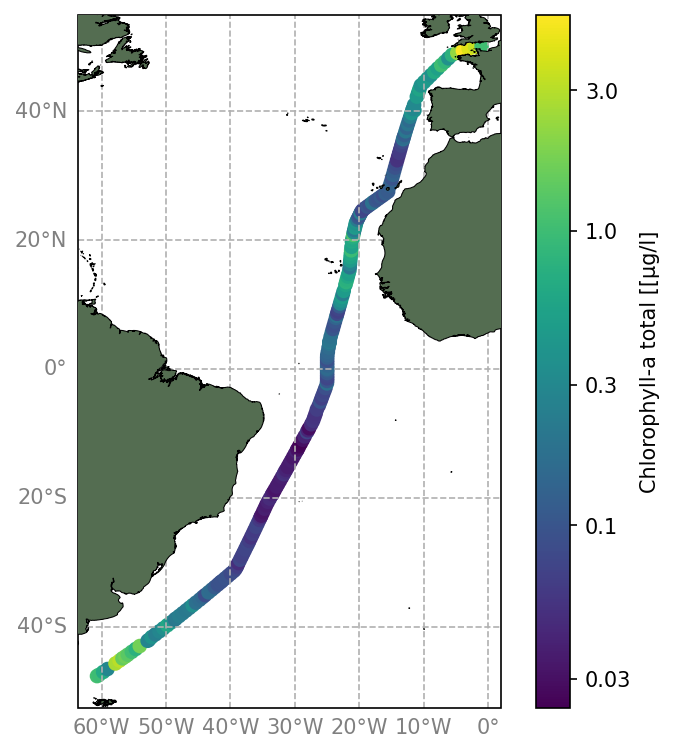

In [9]:
# set up our figure
fig, m = plt.subplots(1, 1, figsize=(6, 6), dpi=150, subplot_kw={"projection": cartopy.crs.PlateCarree()})

# plot cruise track and data points
p2, = m.plot(df["Longitude"], df["Latitude"], zorder=1, color='0.5', transform = cartopy.crs.PlateCarree())
p3 = m.scatter(df["Longitude"], df["Latitude"], c=np.log10(df["Chl a [µg/l]"]), zorder=2, transform = cartopy.crs.PlateCarree(), cmap="viridis", edgecolor=None)

# plot colorbar
cbar = plt.colorbar(p3, label="Chlorophyll-a total [[µg/l]")
tick_labels = [0.03, 0.1, 0.3, 1.0, 3.0]
ticks = [np.log10(i) for i in tick_labels]
cbar.set_ticks(ticks)
cbar.set_ticklabels(tick_labels)

# add some map embellishments
embellish_plot(m)

<div class="alert alert-info" role="alert">

## <a id='section3'></a>Loading ThoMaS
[Back to top](#TOC-TOP)

</div>

Before you use ThoMas, you must ensure that you have have completed the following two steps:
1. Ensure that you have all the Python dependencies you need to run ThoMaS. If you have installed and activated the **cmts_ocean_colour_applications** environment then you are all set.
1. Ensure that ThoMaS can access the EUMETSAT Data Store, which you can do by completing the "**EUMDAC**" section of the <a href="../../working-with-python/API_authentication.ipynb" target="_blank"> set credentials notebook</a>.

ThoMaS can be used from the <a href="https://gitlab.eumetsat.int/eumetlab/oceans/ocean-science-studies/ThoMaS/-/blob/main/README_examples.md" target="_blank">command line</a>, but here we will use it as a Python library. Lets import ThoMaS into our notebook.

In [10]:
sys.path.append("ThoMaS")
from main import ThoMaS_main as ThoMaS

Now we should have ThoMaS imported and configured for use, so we can proceed with our examples.

<div class="alert alert-info" role="alert">

## <a id='section4'></a>Configuring ThoMaS for our experiment
[Back to top](#TOC-TOP)

</div>

<div class="alert alert-success" role="alert">

Run ThoMaS for:

1. our in situ data to SeaBASS/OCDB format
1. full matchup exercise: satellite extractions + minifiles + extraction statistics + matchup statistics
1. apply the <a href="https://ioccg.org/bibliography/morel-a-antoine-d-and-b-gentili-2002/" target="_blank">Morel, Antoine and Gentili, 2002</a> BRDF correction
1. apply the EUMETSAT standard protocol for extractions and for insitu-extraction comparison.


</div>

Firstly, we need to prepare our in situ data in the correct SeaBASS/OCDB format. Lets start by defining our output path and output file.

In [11]:
output_path = os.path.join(os.getcwd(), 'Cruise')
os.makedirs(output_path, exist_ok=True)
path_insitu = os.path.join(output_path, 'Cruise_OCDB.sb')

Now we will write our data into the correct format, using the OCDB_template.sb template as a start point.

In [12]:
# make OCDB format output
with open(os.path.join(os.getcwd(), "templates", "OCDB_template.sb")) as file:
    lines = [line.rstrip() for line in file]

for ii, cruise_time in zip(range(len(df)), cruise_times):
    row = f"{df.iloc[ii]['Station']}, {cruise_time.strftime('%Y%m%d')}, {cruise_time.strftime('%H:%M:00')}, {df.iloc[ii]['Latitude']}, {df.iloc[ii]['Longitude']}, {df.iloc[ii]['Chl a [µg/l]']}"
    lines.append(row)

with open(path_insitu, 'w') as the_file:
    for line in lines:
        the_file.write(line+ '\n')

Lets take a quick look at a subset of the data....

In [13]:
with open(path_insitu) as file:
    print('\t'.join(["Station", "\tDate", "\tTime"]))
    for line in file:
        if not any(ext in line[0] for ext in ['/', '!']):
            print('\t'.join(line.rstrip().split(',')[0:3]))

Station		Date		Time
PS113_1-2	 20230509	 18:37:00
PS113_UW_1	 20230509	 20:02:00
PS113_UW_2	 20230509	 23:01:00
PS113_UW_3	 20230510	 02:04:00
PS113_UW_4	 20230510	 08:01:00
PS113_UW_5	 20230510	 11:00:00
PS113_3-2	 20230510	 15:45:00
PS113_UW_6	 20230510	 19:59:00
PS113_UW_7	 20230510	 22:59:00
PS113_UW_8	 20230511	 02:02:00
PS113_UW_9	 20230511	 05:01:00
PS113_UW_10	 20230511	 08:00:00
PS113_5-2	 20230511	 15:37:00
PS113_UW_11	 20230511	 17:01:00
PS113_UW_12	 20230511	 20:02:00
PS113_UW_13	 20230511	 23:00:00
PS113_UW_14	 20230512	 02:03:00
PS113_UW_15	 20230512	 05:00:00
PS113_UW_16	 20230512	 08:00:00
PS113_UW_17	 20230512	 11:02:00
PS113_6-2	 20230512	 15:39:00
PS113_UW_18	 20230512	 17:02:00
PS113_UW_19	 20230512	 20:02:00
PS113_UW_20	 20230512	 22:59:00
PS113_UW_21	 20230513	 02:00:00
PS113_UW_22	 20230513	 05:00:00
PS113_UW_23	 20230513	 08:00:00
PS113_UW_24	 20230513	 11:02:00
PS113_7-2	 20230513	 16:06:00
PS113_UW_25	 20230513	 20:00:00
PS113_UW_26	 20230513	 23:00:00
PS113_U

As before we will define a configuration file. However, there are some differences to before. We need to define all the steps in our analysis, including:
* how we handle the *in situ* data
* how we handle the satellite data
* how we handle the generation of satellite minifiles
* how we handle the construction of the extraction data base
* how we handle the generation of the match-up database (MDB)

Lets set up our configuration file to specify all the relevant steps in our desired workflow. For more information on each of these steps, you should see the relevant ThoMaS README sections for each step as well as the examples.

*Note: You can find Python examples in the ThoMaS repository <a href="https://gitlab.eumetsat.int/eumetlab/oceans/ocean-science-studies/ThoMaS/-/tree/main/examples">examples</a> folder, and Jupyter Notebook examples in the <a href="https://gitlab.eumetsat.int/eo-lab-usc-open/ocean/sensors/learn-olci/-/blob/main/2_OLCI_advanced/2_4_OLCI_matchup_validation.ipynb">learn-olci</a> repository.

We will make the following decisions;

1. I wish to get matchups between my in situ data set and S3A/OLCI standard FR Level 2 SatData:
    * using the standard extraction protocol from EUMETSAT,
    * an extraction window of 5x5,
    * an insitu-satellite time difference threshold of 6 hours (3600 seconds * 6).
1. I am not interested in getting ancillary data from ECMWF corresponding to the insitu data.
1. I want to apply the Morel, Antoine and Gentili 2002 BRDF correction to both satellite and insitu.
1. I may have several insitu measurements corresponding to one single SatData within the time window that I selected, but I wish to keep only the closest in time with the satellite overpass.
1. I wish my satellite data to be stored in the ./Cruise/SatData directory. All the other outputs (IDB, minifiles, EDB, MDB, etc.) to be stored in the ./Cruise directory

<hr>


In [14]:
# Build your config_file.ini
path_to_config_file = os.path.join(output_path, 'config_file.ini')
config_params = {}

# global
config_params['global'] = {}
config_params['global']['path_output'] = output_path
config_params['global']['SetID'] = 'Cruise'

# workflow
config_params['workflow'] = {}
config_params['workflow']['workflow'] = 'MDB'

# insitu
config_params['insitu'] = {}
config_params['insitu']['insitu_input'] = path_insitu
config_params['insitu']['insitu_satelliteTimeToleranceSeconds'] = 3600*6
config_params['insitu']['insitu_getAncillary'] = False 
config_params['insitu']['insitu_BRDF'] = 'M02'

# satellite
config_params['satellite'] = {}
config_params['satellite']['satellite_path-to-SatData'] = os.path.join(output_path, 'SatData')
config_params['satellite']['satellite_source'] = 'online'
config_params['satellite']['satellite_collections'] = 'operational'
config_params['satellite']['satellite_platforms'] = 'S3A'
config_params['satellite']['satellite_resolutions'] = 'FR'
config_params['satellite']['satellite_BRDF'] = 'M02'

# minifiles
config_params['minifiles'] = {}
config_params['minifiles']['minifiles_winSize'] = 5

# EDB
config_params['EDB'] = {}
config_params['EDB']['EDB_protocols_L2'] = 'EUMETSAT_standard_L2'
config_params['EDB']['EDB_winSizes'] = 5

# MDB
config_params['MDB'] = {}
config_params['MDB']['MDB_time-interpolation'] = 'insitu2satellite_NN'
config_params['MDB']['MDB_stats_plots'] = True
config_params['MDB']['MDB_stats_protocol'] = 'EUMETSAT_standard_L2'

# Write config_params sections into config_file.ini
write_config_file(path_to_config_file, config_params)

Lets run this configuration (which will take some time)...

In [15]:
# Run ThoMaS and check all the outputs in the output directory
ThoMaS(path_to_config_file)


Running Cruise

Building satellite_datasets file from specified options in config_file...

Step MDB
Creating MDB (matchup data base) by merging IDB (insitu) and EDB (extraction) data bases
Creating MDB file: /Users/benloveday/Code/git_repositories/CMTS/internal/ocean/applications/ocean-colour-applications/2_methodological_approaches/Insitu_comparison/Cruise/MDB/MDB_S3A_OLCI_L2_IPF_OL__L2M.003_FR_EUMETSAT_standard_L2_5x5_Cruise.nc!
Creating MDB CSV: /Users/benloveday/Code/git_repositories/CMTS/internal/ocean/applications/ocean-colour-applications/2_methodological_approaches/Insitu_comparison/Cruise/MDB/MDB_S3A_OLCI_L2_IPF_OL__L2M.003_FR_EUMETSAT_standard_L2_5x5_Cruise.csv

Creating MDB (matchup data base) plots
Creating MDB plot: /Users/benloveday/Code/git_repositories/CMTS/internal/ocean/applications/ocean-colour-applications/2_methodological_approaches/Insitu_comparison/Cruise/MDB/chl_S3A_OLCI_L2_IPF_OL__L2M.003_FR_EUMETSAT_standard_L2_5x5_Cruise.png

Run "Cruise" finished


ThoMaS f

...and check our outputs. In this case, we have run a full analysis, so along side all of our data we have some summary plots. Lets view some...

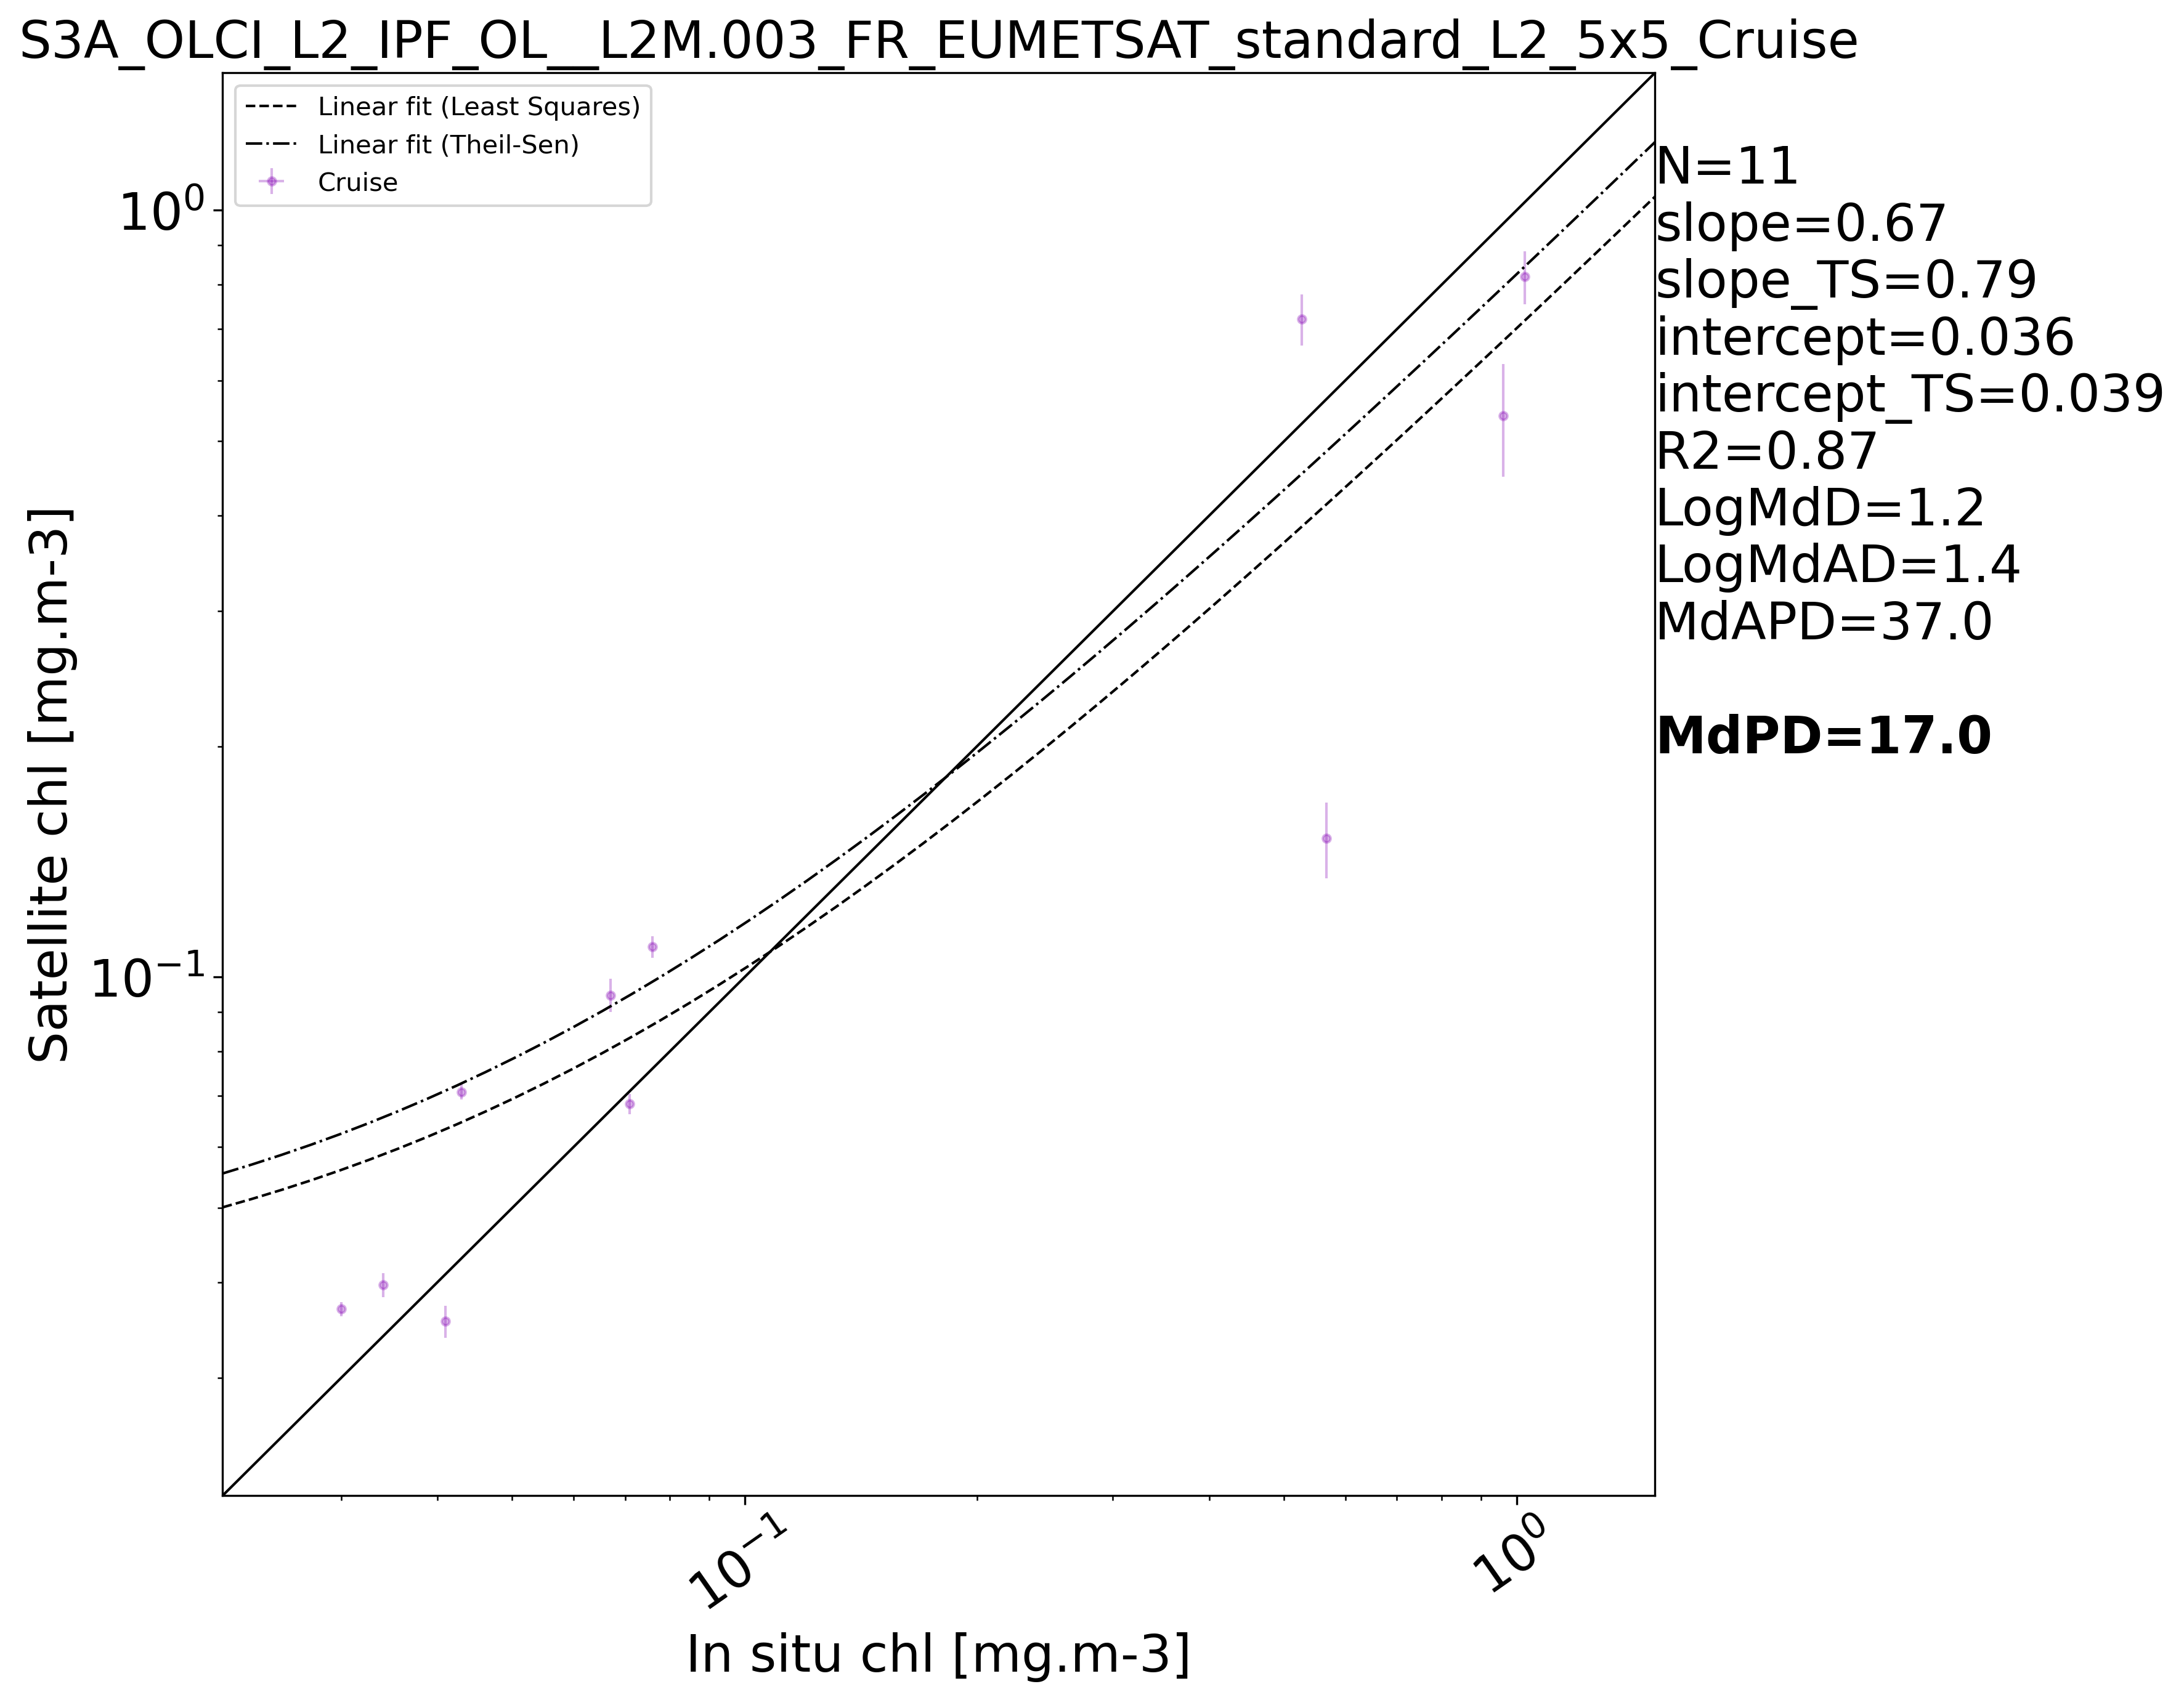

In [16]:
images = glob.glob(os.path.join(output_path, "MDB", "*.png"))
for image in sorted(images):
    display(Image(image))

<div class="alert alert-info" role="alert">

## <a id='section6'></a>What next?
[Back to top](#TOC-TOP)

</div>

Here, we have run ThoMaS to look at only chlorophyll, and only using OLCI. However, the package is designed to support full radiometric match-up validation routines for both hyperspectral and multispectral data sources, applying the necessary BRDF corrections as required. ThoMaS also support both MODIS and PACE products.

You can find many more example of configuration files in the ./ThoMaS/examples directory. Building on these, and the examples shown above you should be able to build a validation workflow that works for your circumstances!

<hr>
<a href="../../Index.ipynb" target="_blank"><< Index</a>
<hr>
<a href="https://gitlab.eumetsat.int/eumetlab/ocean" target="_blank">View on GitLab</a> | <a href="https://training.eumetsat.int/" target="_blank">EUMETSAT Training</a> | <a href=mailto:ops@eumetsat.int target="_blank">Contact helpdesk for support </a> | <a href=mailto:training@eumetsat.int target="_blank">Contact our training team to collaborate on and reuse this material</a></span></p>